In [8]:
folder = r'C:\Users\USER\Downloads\chương trình học UEH\môn học kì 4\Machine Learning\Project MeanShift\Mean_Shift_Clustering'

In [ ]:
# Đảm bảo hiển thị biểu đồ trực tiếp trong notebook
%matplotlib inline
import sys
sys.path.append(folder)
# Import các module cần thiết
import numpy as np
import matplotlib.pyplot as plt
from src.core.mean_shift import MeanShift
from src.core.preprocessing import load_data, normalize_data
from src.core.evaluation import calculate_silhouette_score, calculate_davies_bouldin_score

from sklearn.cluster import MeanShift


--- Bandwidth: 0.5 ---
Silhouette Score: 0.6214218944532653
Davies-Bouldin Index: 0.6220651945911283


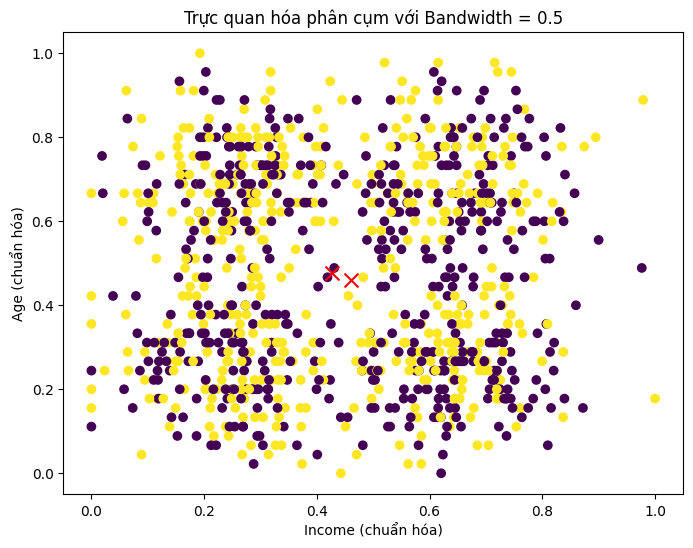

In [23]:
data = load_data(folder + r'/data/raw/Customers.csv')
data = normalize_data(data)

# Thử nghiệm với bandwidth = 0.5
bw = 0.5
print(f"\n--- Bandwidth: {bw} ---")

# Khởi tạo và huấn luyện mô hình Mean-Shift
# model = MeanShift(bandwidth=bw, kernel='gaussian')
# model.fit(data)
model = MeanShift(bandwidth=bw)
model.fit(data)

# Lấy nhãn cụm và tâm cụm
labels = model.labels_
centers = model.cluster_centers_

# Đánh giá chất lượng phân cụm
sil_score = calculate_silhouette_score(data, labels)
db_score = calculate_davies_bouldin_score(data, labels)

# In kết quả đánh giá
print(f"Silhouette Score: {sil_score if sil_score is not None else 'N/A'}")
print(f"Davies-Bouldin Index: {db_score if db_score is not None else 'N/A'}")

plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
if centers is not None:
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=100)
plt.title(f'Trực quan hóa phân cụm với Bandwidth = {bw}')
plt.xlabel('Income (chuẩn hóa)')
plt.ylabel('Age (chuẩn hóa)')
plt.show()